In [1]:
import gym

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gym_anytrading

In [2]:
# get data for S&P 500, market watch

data = pd.read_csv('data/SPX.csv')

data.head()

,Date,Open,High,Low,Close
0,03/11/2022,"4,279.50","4,291.01","4,200.49","4,204.31"
1,03/10/2022,"4,252.55","4,268.28","4,209.80","4,259.52"
2,03/09/2022,"4,223.10","4,299.40","4,223.10","4,277.88"
3,03/08/2022,"4,202.66","4,276.94","4,157.87","4,170.70"
4,03/07/2022,"4,327.01","4,327.01","4,199.85","4,201.09"


In [21]:
data.shape

(254, 4)

In [3]:
data.dtypes

Date     object
Open     object
High     object
Low      object
Close    object
dtype: object

In [4]:
# Preprocess Data

# convert data to datetime object
data['Date'] = pd.to_datetime(data['Date'])

# sort data in ascending order
data.sort_values('Date', ascending=True, inplace=True)

# set Date to index
data.set_index('Date', inplace=True)

# remove commas from numbers
data['Open'] = data['Open'].apply(lambda  x: float(x.replace(',', '')))
data['Close'] = data['Close'].apply(lambda  x: float(x.replace(',', '')))
data['High'] = data['High'].apply(lambda  x: float(x.replace(',', '')))
data['Low'] = data['Low'].apply(lambda  x: float(x.replace(',', '')))

In [5]:
# creating environment

env = gym.make('stocks-v0', df=data, frame_bound=(5, 200), window_size=5)

In [6]:
env.signal_features  # extracted features over time, creates gym observations

array([[ 3.93934e+03,  0.00000e+00],
       [ 3.94334e+03,  4.00000e+00],
       [ 3.96894e+03,  2.56000e+01],
       [ 3.96271e+03, -6.23000e+00],
       [ 3.97412e+03,  1.14100e+01],
       [ 3.91546e+03, -5.86600e+01],
       [ 3.91310e+03, -2.36000e+00],
       [ 3.94059e+03,  2.74900e+01],
       [ 3.91052e+03, -3.00700e+01],
       [ 3.88914e+03, -2.13800e+01],
       [ 3.90952e+03,  2.03800e+01],
       [ 3.97454e+03,  6.50200e+01],
       [ 3.97109e+03, -3.45000e+00],
       [ 3.95855e+03, -1.25400e+01],
       [ 3.97289e+03,  1.43400e+01],
       [ 4.01987e+03,  4.69800e+01],
       [ 4.07791e+03,  5.80400e+01],
       [ 4.07394e+03, -3.97000e+00],
       [ 4.07995e+03,  6.01000e+00],
       [ 4.09717e+03,  1.72200e+01],
       [ 4.12880e+03,  3.16300e+01],
       [ 4.12799e+03, -8.10000e-01],
       [ 4.14159e+03,  1.36000e+01],
       [ 4.12466e+03, -1.69300e+01],
       [ 4.17042e+03,  4.57600e+01],
       [ 4.18547e+03,  1.50500e+01],
       [ 4.16326e+03, -2.22100e+01],
 

In [7]:
env.action_space  # buy, sell actions

Discrete(2)

{'total_reward': -48.45000000000027, 'total_profit': 0.4925217407265759, 'position': 1}


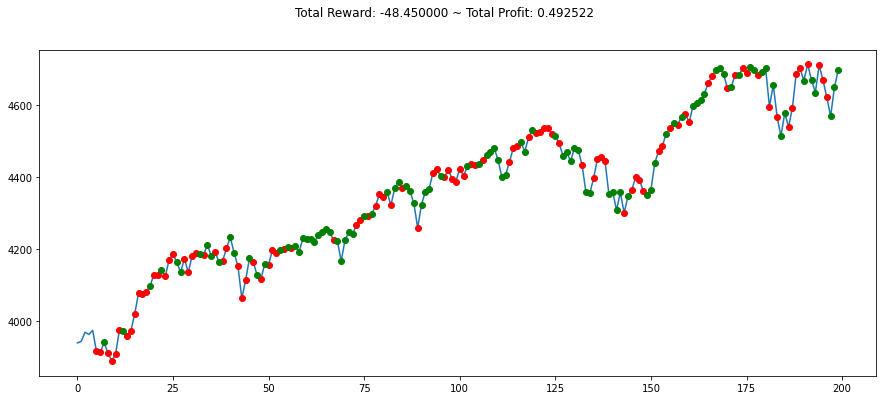

In [8]:
#  random actions
state = env.reset()

while True:
    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action)

    if done:
        print(info)
        break

plt.figure(figsize=(15, 6))
plt.cla()
env.render_all()
plt.show()

In [9]:
# creating model and learning environment

env_training = lambda: gym.make('stocks-v0', df=data,frame_bound=(5, 200), window_size=5)

In [12]:
# vectorize environment

from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

In [13]:
env = DummyVecEnv([env_training])

In [16]:
# create model

model = A2C('MlpPolicy', env, verbose=1)  # actor to critic model

Using cpu device


In [19]:
model.learn(total_timesteps=100000)

------------------------------------
| time/                 |          |
|    fps                | 788      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.691   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 139      |
|    policy_loss        | -8.88    |
|    value_loss         | 403      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 895      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.626   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 239      |
|    policy_loss        | 22       |
|    value_loss         | 1.66e+03 |
-

### Visualizing model

In [23]:
env = gym.make('stocks-v0', df=data, frame_bound=(200, 254), window_size=5)
obs = env.reset()

while True:
    obs = obs[np.newaxis, ...]
    action, states = model.predict(obs)
    obs, rewards, done, info = env.step(action)

    if done:
        print(info)
        break

{'total_reward': 14.149999999998727, 'total_profit': 0.8382853642483451, 'position': 1}


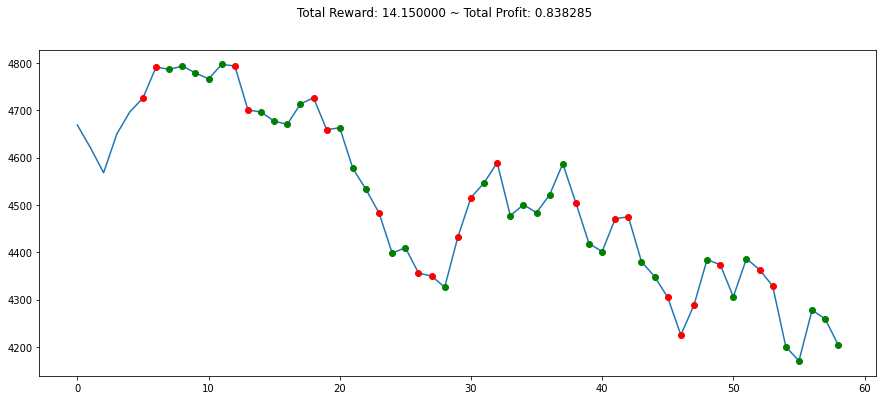

In [24]:
plt.figure(figsize=(15, 6))
plt.cla()
env.render_all()
plt.show()

### Implementing Technical indicators in data

In [36]:
# get volume for s&p 500
import yfinance as yf
from pandas_datareader import data as pdr


data = pdr.get_data_yahoo('SPY', start=data.index[0], end=data.index[-1])

In [37]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-11,395.649994,391.739990,392.230011,393.529999,86245000.0,388.353333
2021-03-12,394.209991,391.200012,392.070007,394.059998,64653600.0,388.876343
2021-03-15,396.690002,392.029999,394.329987,396.410004,73427200.0,391.195435
2021-03-16,397.829987,395.079987,397.070007,395.910004,73722500.0,390.702026
2021-03-17,398.119995,393.299988,394.529999,397.260010,97959300.0,392.034271


In [39]:
from ta import add_all_ta_features

df2 = add_all_ta_features(data, open='Open', high='High', low='Low', close='Close', volume='Volume', fillna=True)

/home/rex/Desktop/Projects/study/udemy/AI/PracticalReinforcementLearning/venv/lib/python3.8/site-packages/ta/trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/home/rex/Desktop/Projects/study/udemy/AI/PracticalReinforcementLearning/venv/lib/python3.8/site-packages/ta/trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
/home/rex/Desktop/Projects/study/udemy/AI/PracticalReinforcementLearning/venv/lib/python3.8/site-packages/ta/trend.py:938: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._psar_up = pd.Series(index=self._psar.index)
/home/rex/Desktop/Projects/study/udemy/AI/PracticalReinforcementLearning/venv/lib/python3.8/site-packages/ta/trend.py:939: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64'

In [41]:
pd.set_option('display.max_columns', None)  # show all columns

In [42]:
data

,High,Low,Open,Close,Volume,Adj Close,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_vwap,volume_mfi,volume_nvi,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_atr,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_stc,trend_adx,trend_adx_pos,trend_adx_neg,trend_cci,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-11,395.649994,391.739990,392.230011,393.529999,86245000.0,388.353333,-7.278687e+06,86245000.0,-0.084395,0.000000e+00,0.000000,0.000000,-8.799895e+06,393.639994,50.000000,1000.000000,393.529999,393.529999,393.529999,0.000000,0.000000,0.0,0.0,393.639994,397.549998,389.729991,1.986589,0.485934,0.0,0.0,391.739990,395.649994,393.694992,0.993572,0.457802,0.000000,0.000000,0.000000,0.000000,0.000000,393.529999,393.529999,393.529999,393.529999,0.000000,0.000000,0.000000,-9.362221,1.000000,44.179883,-100.934169,-100.934169,0.000000,393.694992,393.694992,393.694992,393.694992,0.000000,0.000000,0.000000,0.000000,0.000000,434.380306,430.098366,4.0,4.0,0.0,-1.000000,-1.000000,0.0,0.0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.780227,45.780227,-54.219773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,393.529999,-10.093417,0.000000,0.000000
2021-03-12,394.209991,391.200012,392.070007,394.059998,64653600.0,388.876343,5.093125e+07,150898600.0,0.337520,3.426633e+07,-4.608947,-4.608947,-8.617993e+06,393.432909,0.000000,1001.346781,393.794998,394.324997,393.264999,0.269175,0.750000,0.0,0.0,393.398331,396.858322,389.938339,1.759027,0.595617,0.0,0.0,391.200012,395.649994,393.425003,1.130025,0.642696,0.000000,0.000000,0.042279,0.008456,0.033823,393.794998,393.794998,393.611537,393.569258,0.050429,0.090853,-0.040424,0.000263,1.962828,43.914884,-100.328747,-100.631458,0.302711,393.425003,393.425003,393.425003,393.425003,0.000000,0.000000,0.000000,0.000000,-66.666667,434.380306,430.098366,8.0,4.0,4.0,-1.000000,-1.000000,0.0,0.0,100.000000,0.000000,0.000000,0.000000,100.000000,41.329370,64.269598,55.024913,-35.730402,0.000000,0.000000,0.010742,0.002148,0.008594,-2.034825,-0.406965,-1.627860,393.925209,0.134678,0.134588,0.134678
2021-03-15,396.690002,392.029999,394.329987,396.410004,73427200.0,391.195435,1.155346e+08,224325800.0,0.515030,5.402176e+07,10.503329,2.947191,5.249628e+05,393.960040,53.296161,1001.346781,394.666667,397.169807,392.163526,1.268483,0.848230,0.0,0.0,393.946665,397.806661,390.086670,1.959654,0.819086,0.0,0.0,391.200012,396.690002,393.945007,1.391045,0.948998,0.000000,0.000000,0.262387,0.059242,0.203145,394.666667,394.666667,394.042070,393.779684,0.148397,0.123602,0.024795,0.001857,2.971482,43.043215,-98.337317,-99.866744,1.529427,393.945007,393.945007,393.945007,393.945007,0.000000,0.000000,0.000000,0.000000,100.000000,434.380306,430.098366,12.0,4.0,8.0,-1.000000,395.649994,0.0,1.0,100.000000,0.000000,0.000000,0.000000,100.000000,62.521577,94.899831,68.316552,-5.100169,0.00

### Creating Environment with Technical Indicators

In [49]:
from gym_anytrading.envs import StocksEnv  # extend environment to use any data

In [52]:
def processed_data(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]

    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]

    signal_features = env.df.loc[:, ['Close', 'Volume', 'momentum_rsi', 'volume_obv', 'trend_macd_diff']].to_numpy()[start:end]

    return prices, signal_features

In [53]:
class MyCustomEnv(StocksEnv):
    _process_data = processed_data

In [54]:
env2 = MyCustomEnv(df=df2, window_size=5, frame_bound=(5, 200))

In [55]:
env2.signal_features

array([[ 3.93529999e+02,  8.62450000e+07,  1.00000000e+02,
         8.62450000e+07,  0.00000000e+00],
       [ 3.94059998e+02,  6.46536000e+07,  1.00000000e+02,
         1.50898600e+08,  3.38232839e-02],
       [ 3.96410004e+02,  7.34272000e+07,  1.00000000e+02,
         2.24325800e+08,  2.03144800e-01],
       [ 3.95910004e+02,  7.37225000e+07,  8.40720568e+01,
         1.50603300e+08,  2.66174130e-01],
       [ 3.97260010e+02,  9.79593000e+07,  8.91138452e+01,
         2.48562600e+08,  3.76733878e-01],
       [ 3.91480011e+02,  1.15349100e+08,  3.62326277e+01,
         1.33213500e+08,  5.54101387e-02],
       [ 3.89480011e+02,  1.13624500e+08,  2.96714480e+01,
         1.95890000e+07, -2.78661081e-01],
       [ 3.92589996e+02,  7.37786000e+07,  4.60358597e+01,
         9.33676000e+07, -2.76467157e-01],
       [ 3.89500000e+02,  9.06866000e+07,  3.68589580e+01,
         2.68100000e+06, -4.58661987e-01],
       [ 3.87519989e+02,  9.75886000e+07,  3.24017526e+01,
        -9.49076000e+07

In [56]:
### Visualizing Agent in TA Environment

In [58]:
training_env = lambda: env2
env = DummyVecEnv([training_env])

In [59]:
model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=100000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 658      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.575   |
|    explained_variance | -0.0964  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -1.87    |
|    value_loss         | 13.8     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 659      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.691   |
|    explained_variance | 0.0542   |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -1.05    |
|    value_loss      

In [60]:
env = MyCustomEnv(df2, window_size=5, frame_bound=(200, 254))
obs = env.reset()

while True:
    obs = obs[np.newaxis, ...]
    action, states = model.predict(obs)
    obs, rewards, done, info = env.step(action)

    if done:
        print(info)
        break

{'total_reward': -48.51995849609375, 'total_profit': 0.7476691837549242, 'position': 0}


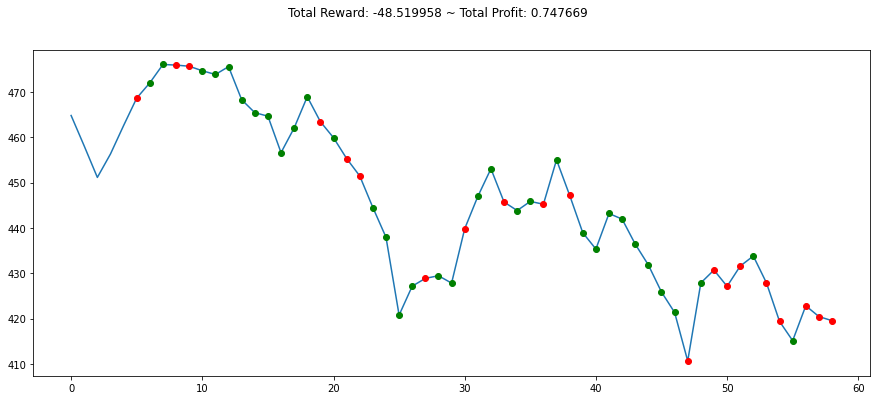

In [61]:
plt.figure(figsize=(15, 6))
plt.cla()
env.render_all()
plt.show()